In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('OnlineRetailData.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [2]:
df2 = pd.read_csv('OnlineRetail.csv', encoding = 'latin-1')
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


relations between products are created on the basis of this research:
    
- support- what is the chance of Product A & Product B both being purchased
    divided by total number of transactions?
    
- confidence- what is the chance of both products being purchased divided by  product A (or B) is purchased?
    
- lift- the probability of correlation between the two products or if it's only a co-occurrence
 

## What is ASM?
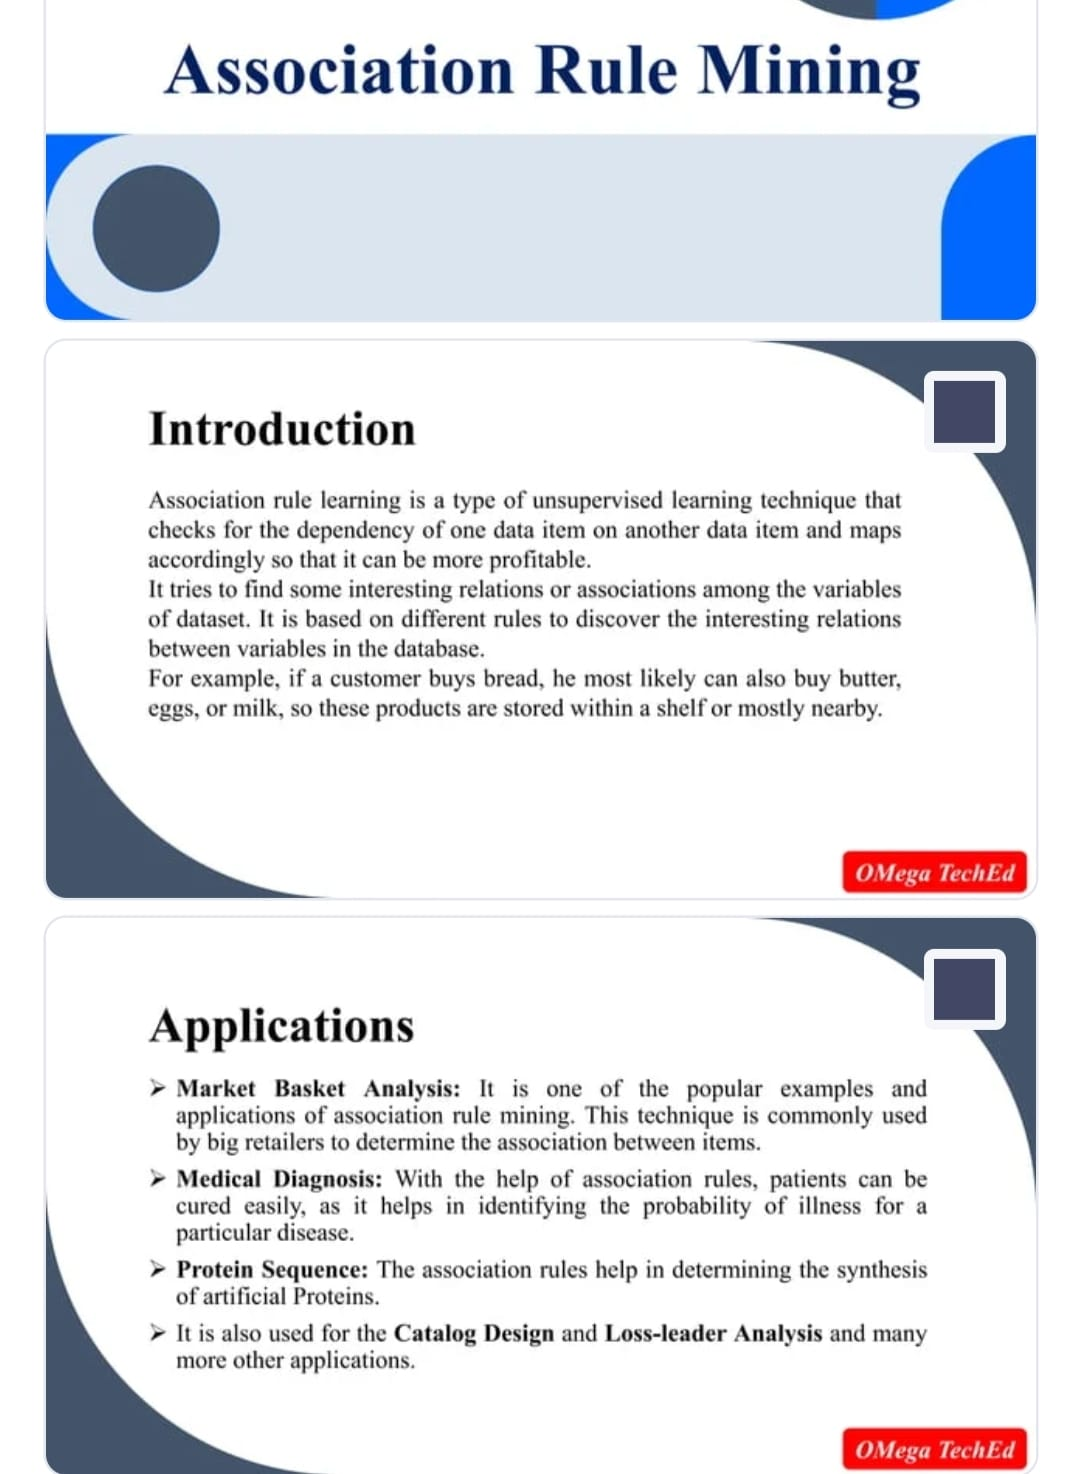

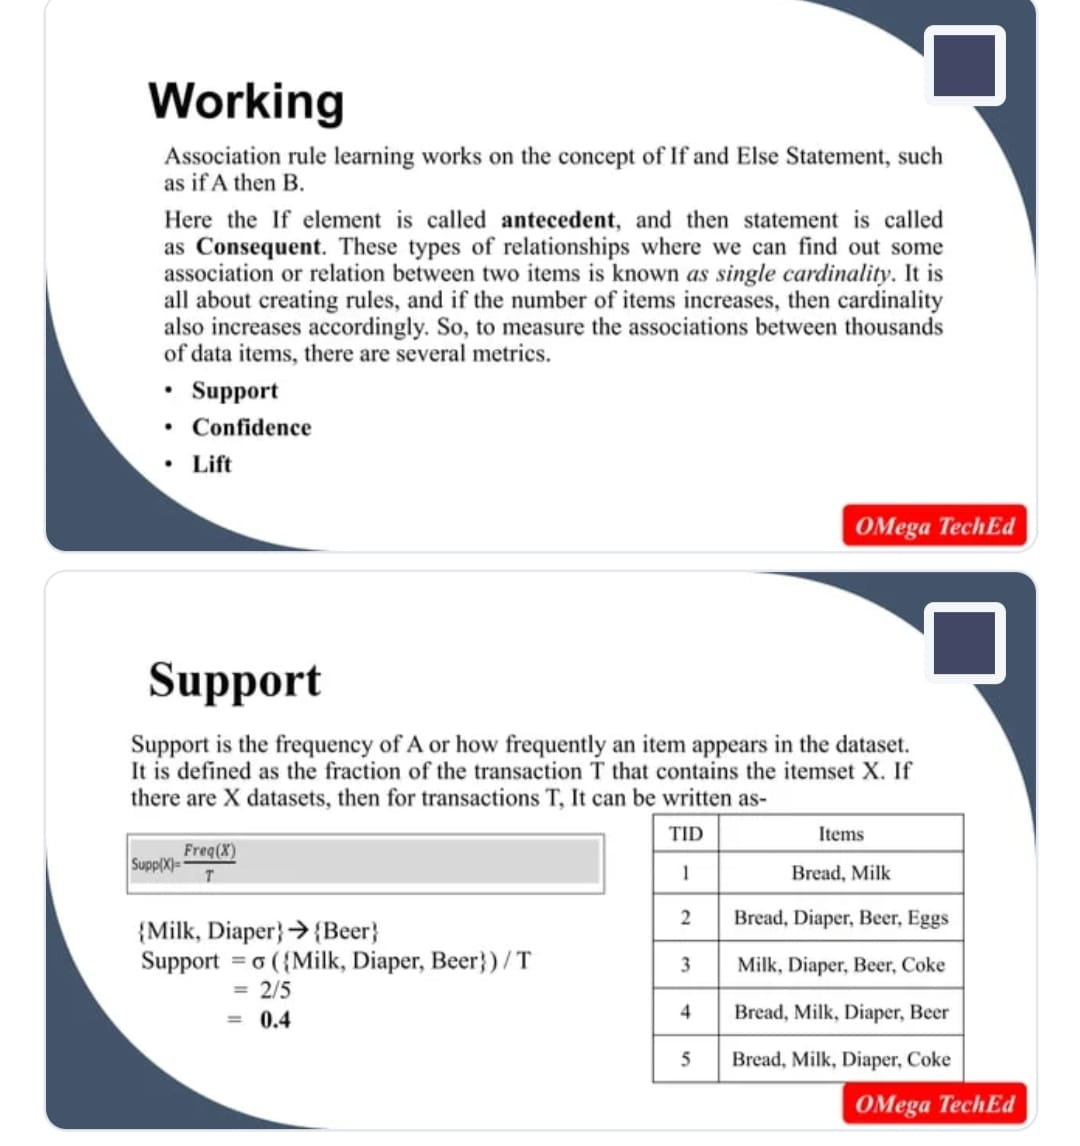

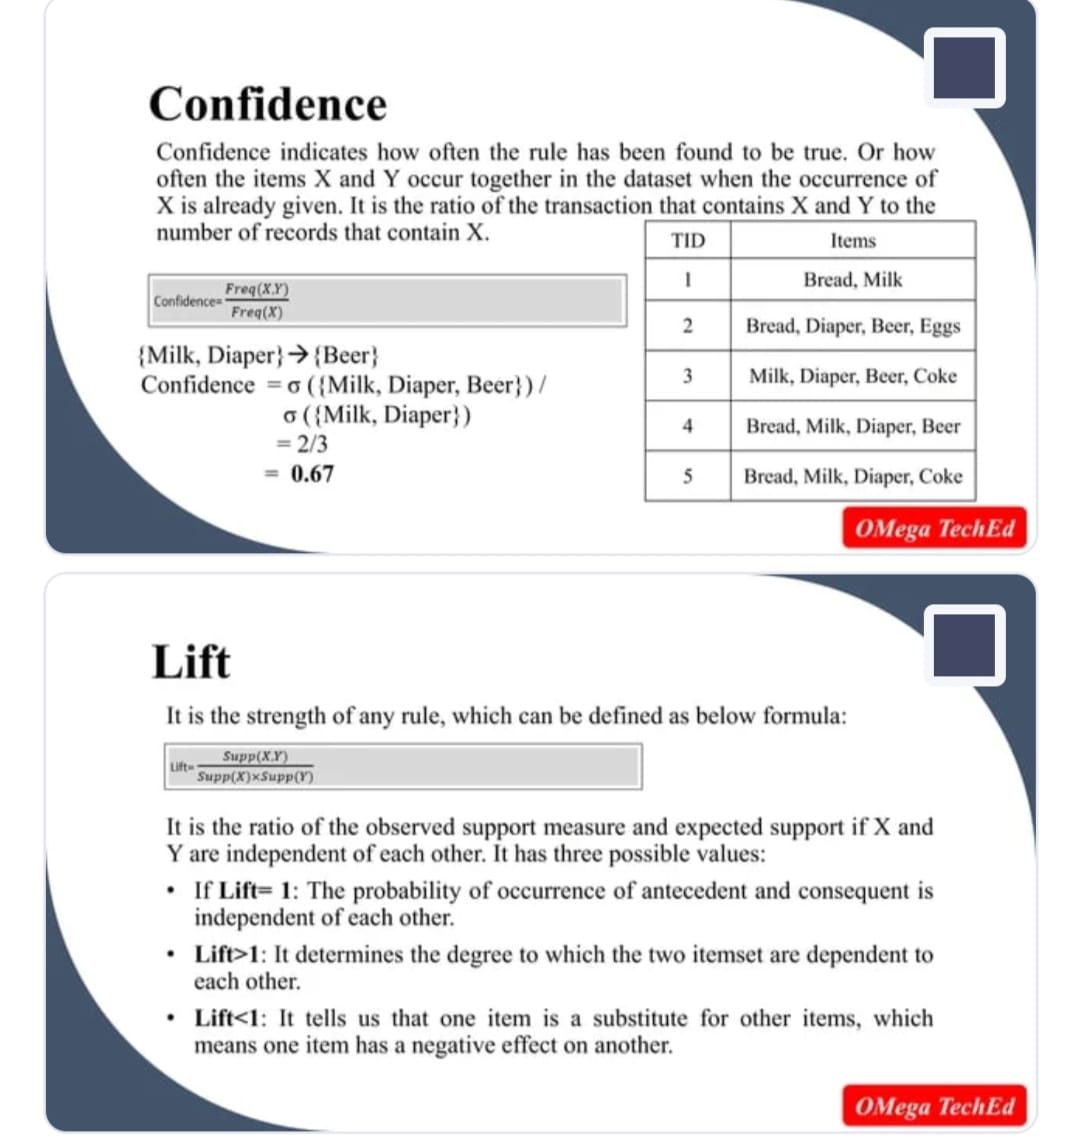

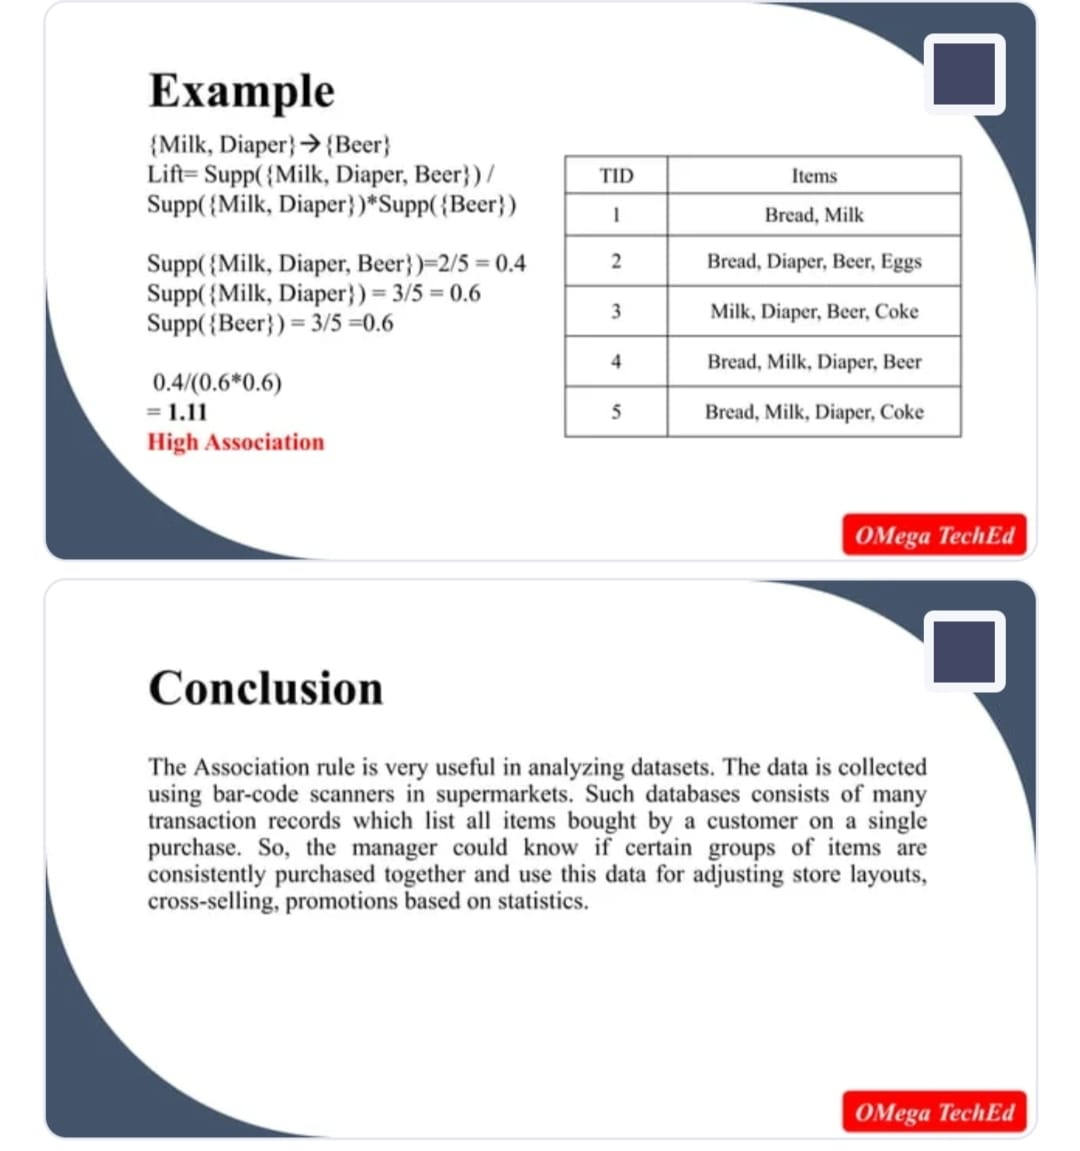

In [31]:
import mlxtend
from mlxtend.frequent_patterns import apriori as mlx_apriori
#apriori is the package for Association Rule Mining (ASM)
from mlxtend.frequent_patterns import association_rules

In [5]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df2.shape

(541909, 8)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df2['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [9]:
df2['Description'][10]

"POPPY'S PLAYHOUSE BEDROOM "

In [10]:
df2['Description'] = df2['Description'].str.strip()
df2.dropna(axis = 0, subset = ['InvoiceNo'], inplace = True)
df2['InvoiceNo'] = df2['InvoiceNo'].astype('str')
df2 = df[~df2['InvoiceNo'].str.contains('C')]
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [11]:
df['InvoiceNo'].str.contains('C').value_counts()

InvoiceNo
False    532621
True       9288
Name: count, dtype: int64

In [12]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [13]:
df2.Description.nunique()

4207

In [14]:
df2.InvoiceNo.nunique()

22064

In [15]:
basket = (df2[df2['Country'] == 'France'].groupby(['InvoiceNo', 'Description'])
['Quantity'].sum().unstack().reset_index().fillna(0)).set_index('InvoiceNo')
basket

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def encode_units(x):
    if x<=0:
        return 0
    if x>0:
        return 1

In [20]:
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace = True, axis = 1)
basket_sets

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
transaction = []
for i in range(0, 392):
    transaction.append([str(basket.values[i,j]) for j in range(0,1564)])

In [16]:
from apyori import apriori

In [42]:
freq_itemsets = mlx_apriori(basket_sets, min_support = 0.015, use_colnames = True)
rules = association_rules(freq_itemsets, num_itemsets= 392, metric = 'lift', min_threshold = 2)
rules.head()
#frequent_itemsets

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,( DOLLY GIRL BEAKER),(DOLLY GIRL CHILDRENS BOWL),0.022959,0.045918,0.017857,0.777778,16.938272,1.0,0.016803,4.293367,0.963073,0.350000,0.767083,0.583333
1,(DOLLY GIRL CHILDRENS BOWL),( DOLLY GIRL BEAKER),0.045918,0.022959,0.017857,0.388889,16.938272,1.0,0.016803,1.598794,0.986249,0.350000,0.374529,0.583333
2,(DOLLY GIRL CHILDRENS CUP),( DOLLY GIRL BEAKER),0.040816,0.022959,0.015306,0.375000,16.333333,1.0,0.014369,1.563265,0.978723,0.315789,0.360313,0.520833
3,( DOLLY GIRL BEAKER),(DOLLY GIRL CHILDRENS CUP),0.022959,0.040816,0.015306,0.666667,16.333333,1.0,0.014369,2.877551,0.960836,0.315789,0.652482,0.520833
4,(PLASTERS IN TIN SPACEBOY),( DOLLY GIRL BEAKER),0.137755,0.022959,0.015306,0.111111,4.839506,1.0,0.012143,1.099171,0.920118,0.105263,0.090223,0.388889


In [44]:
rules.shape

(26738, 14)

In [43]:
rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(DOLLY GIRL BABY GIFT SET),( SPACEBOY BABY GIFT SET),0.022959,0.040816,0.022959,1.000000,24.500000,1.0,0.022022,inf,0.981723,0.562500,1.000000,0.781250
22,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.022959,0.045918,0.020408,0.888889,19.358025,1.0,0.019354,8.586735,0.970627,0.421053,0.883541,0.666667
68,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.028061,0.102041,0.022959,0.818182,8.018182,1.0,0.020096,4.938776,0.900554,0.214286,0.797521,0.521591
70,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.028061,0.094388,0.022959,0.818182,8.668305,1.0,0.020311,4.980867,0.910178,0.230769,0.799232,0.530713
85,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.030612,0.096939,0.025510,0.833333,8.596491,1.0,0.022543,5.418367,0.911579,0.250000,0.815443,0.548246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26696,"(PACK OF 6 SKULL PAPER CUPS, SET OF 9 HEART SH...","(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.015306,0.030612,0.015306,1.000000,32.666667,1.0,0.014838,inf,0.984456,0.500000,1.000000,0.750000
26701,"(PACK OF 6 SKULL PAPER PLATES, SET OF 9 HEART ...","(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF ...",0.017857,0.028061,0.015306,0.857143,30.545455,1.0,0.014805,6.803571,0.984848,0.500000,0.853018,0.701299
26702,"(PACK OF 6 SKULL PAPER PLATES, SET OF 9 HEART ...","(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.017857,0.028061,0.015306,0.857143,30.545455,1.0,0.014805,6.803571,0.984848,0.500000,0.853018,0.701299
26706,"(SET/6 RED SPOTTY PAPER CUPS, SET OF 9 HEART S...","(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF ...",0.017857,0.030612,0.015306,0.857143,28.000000,1.0,0.014759,6.785714,0.981818,0.461538,0.852632,0.678571


In [1]:
#pd.DataFrame(frequent_itemsets)